##### 외곽선 검출
- 원본에 blurring을 진행하여 전처리 후 외곽선 검출

In [24]:
import sys
import random
import numpy as np
import cv2


src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)


if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]
dst1 = np.zeros((h, w, 3), np.uint8)
dst2 = np.zeros((h, w, 3), np.uint8)

# 전처리
src = cv2.blur(src, (3, 3))
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)


# 레이블링
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
for i in range(1, cnt):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    dst1[labels == i] = c

# 외곽선 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst2, contours, i, c, 1)

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

##### 시각화

(-0.5, 299.5, 245.5, -0.5)

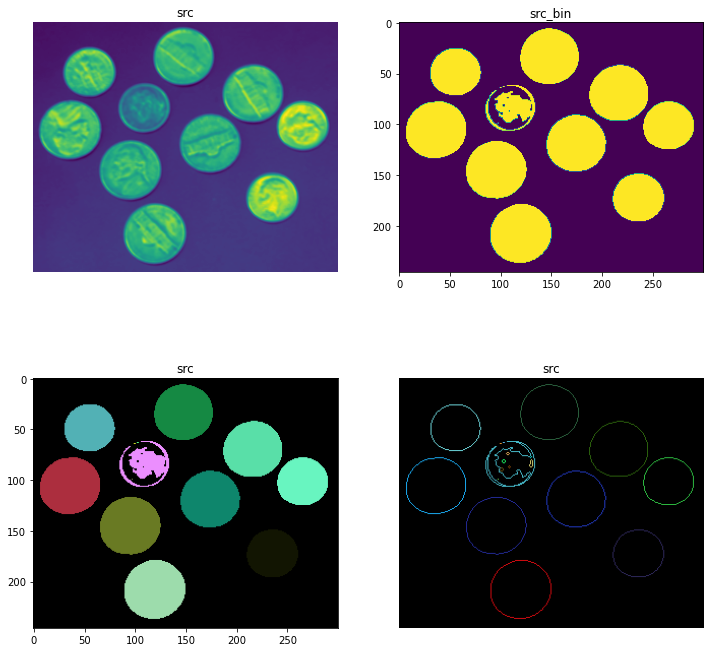

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (12, 12))

ax[0, 0].imshow(src);     ax[0, 0].set_title('src');     plt.axis('off');ax[0, 0].axis('off')
ax[0, 1].imshow(src_bin); ax[0, 1].set_title('src_bin'); plt.axis('off');ax[0, 0].axis('off')
ax[1, 0].imshow(dst1);    ax[1, 0].set_title('src');     plt.axis('off');ax[0, 0].axis('off')
ax[1, 1].imshow(dst2);    ax[1, 1].set_title('src');     plt.axis('off');ax[0, 0].axis('off')

# ax[0, 1]plot(x, y, 'tab:orange')
# ax[0, 1].set_title('Axis [0, 1]')
# ax[1, 0].plot(x, -y, 'tab:green')
# ax[1, 0].set_title('Axis [1, 0]')
# ax[1, 1].plot(x, -y, 'tab:red')
# ax[1, 1].set_title('Axis [1, 1]')

#ax,plt.subplots(221);plt.imshow(src);
#plt.subplots(221);plt.imshow(src);